<a href="https://colab.research.google.com/github/TetianaMar-888/Python_for_ds_tasks/blob/main/Marinoshenko_Tetiana_HW_2_2_%D0%9D%D0%B5%D0%B7%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81%D0%BE%D0%B2%D0%B0%D0%BD%D0%B0_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D0%BE%D0%BA%D0%BB%D0%B0%D1%81%D0%BE%D0%B2%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D0%B8%D1%84%D1%96%D0%BA%D0%B0%D1%86%D1%96%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому ДЗ ми потренуємось розв'язувати задачу багатокласової класифікації за допомогою логістичної регресії з використанням стратегій One-vs-Rest та One-vs-One, оцінити якість моделей та порівняти стратегії.

### Опис задачі і даних

**Контекст**

В цьому ДЗ ми працюємо з даними про сегментацію клієнтів.

Сегментація клієнтів – це практика поділу бази клієнтів на групи індивідів, які схожі між собою за певними критеріями, що мають значення для маркетингу, такими як вік, стать, інтереси та звички у витратах.

Компанії, які використовують сегментацію клієнтів, виходять з того, що кожен клієнт є унікальним і що їхні маркетингові зусилля будуть більш ефективними, якщо вони орієнтуватимуться на конкретні, менші групи зі зверненнями, які ці споживачі вважатимуть доречними та які спонукатимуть їх до купівлі. Компанії також сподіваються отримати глибше розуміння уподобань та потреб своїх клієнтів з метою виявлення того, що кожен сегмент цінує найбільше, щоб точніше адаптувати маркетингові матеріали до цього сегменту.

**Зміст**.

Автомобільна компанія планує вийти на нові ринки зі своїми існуючими продуктами (P1, P2, P3, P4 і P5). Після інтенсивного маркетингового дослідження вони дійшли висновку, що поведінка нового ринку схожа на їхній існуючий ринок.

На своєму існуючому ринку команда з продажу класифікувала всіх клієнтів на 4 сегменти (A, B, C, D). Потім вони здійснювали сегментовані звернення та комунікацію з різними сегментами клієнтів. Ця стратегія працювала для них надзвичайно добре. Вони планують використати ту саму стратегію на нових ринках і визначили 2627 нових потенційних клієнтів.

Ви маєте допомогти менеджеру передбачити правильну групу для нових клієнтів.

В цьому ДЗ використовуємо дані `customer_segmentation_train.csv`[скачати дані](https://drive.google.com/file/d/1VU1y2EwaHkVfr5RZ1U4MPWjeflAusK3w/view?usp=sharing). Це `train.csv`з цього [змагання](https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation/data?select=train.csv)

In [1]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
dataset_url = 'https://www.kaggle.com/abisheksudarshan/customer-segmentation/data'
od.download(dataset_url)
import os
data_dir = './customer-segmentation'
os.listdir(data_dir)
train_csv = data_dir + '/train.csv'

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tetianamarinoshenko
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation


100%|██████████| 98.7k/98.7k [00:00<00:00, 358MB/s]

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')
customer_segmentation_train_df = pd.read_csv("drive/MyDrive/Machine_Learning/customer_segmentation_train.csv")

Mounted at /content/drive


In [3]:
pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

In [4]:
raw_df = pd.read_csv(train_csv, index_col=0)

In [5]:
if raw_df.equals(customer_segmentation_train_df):
    print("Файли однакові")
else:
    print("Файли різні")

Файли різні


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8068 entries, 462809 to 461879
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 693.3+ KB


In [7]:
raw_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.00,Low,4.00,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.00,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.00,High,2.00,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.00,Cat_6,A


**Завдання 1.** Завантажте та підготуйте датасет до аналізу. Виконайте обробку пропущених значень та необхідне кодування категоріальних ознак. Розбийте на тренувальну і тестувальну вибірку, де в тесті 20%. Памʼятаємо, що весь препроцесинг ліпше все ж тренувати на тренувальній вибірці і на тестувальній лише використовувати вже натреновані трансформери.
Але в даному випадку оскільки значень в категоріях небагато, можна зробити обробку і на оригінальних даних, а потім розбити - це простіше. Можна також реалізувати процесинг і тренування моделі з пайплайнами. Обирайте як вам зручніше.

In [8]:
customer_segmentation_train_df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [9]:
customer_segmentation_train_df.shape

(8068, 11)

In [10]:
customer_segmentation_train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.00,Low,4.00,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.00,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.00,High,2.00,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.00,Cat_6,A


In [11]:
customer_segmentation_train_df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.00,8068.00,7239.00,7733.00
mean,463479.21,43.47,2.64,2.85
std,2595.38,16.71,3.41,1.53
min,458982.00,18.00,0.00,1.00
25%,461240.75,30.00,0.00,2.00
50%,463472.50,40.00,1.00,3.00
75%,465744.25,53.00,4.00,4.00
max,467974.00,89.00,14.00,9.00


In [12]:
customer_segmentation_train_df['ID'] = customer_segmentation_train_df['ID'].astype(str)
customer_segmentation_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   object 
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 693.5+ KB


In [13]:
customer_segmentation_train_df.select_dtypes(include='object').columns

Index(['ID', 'Gender', 'Ever_Married', 'Graduated', 'Profession',
       'Spending_Score', 'Var_1', 'Segmentation'],
      dtype='object')

In [14]:
number_customer_segmentation_train_df = customer_segmentation_train_df.select_dtypes(exclude='object')
number_customer_segmentation_train_df.columns

Index(['Age', 'Work_Experience', 'Family_Size'], dtype='object')

In [15]:
customer_segmentation_train_df.dtypes

,0
ID,object
Gender,object
Ever_Married,object
Age,int64
Graduated,object
Profession,object
Work_Experience,float64
Spending_Score,object
Family_Size,float64
Var_1,object


In [16]:
customer_segmentation_train_df.memory_usage()

,0
Index,132
ID,64544
Gender,64544
Ever_Married,64544
Age,64544
Graduated,64544
Profession,64544
Work_Experience,64544
Spending_Score,64544
Family_Size,64544


In [17]:
customer_segmentation_train_df.memory_usage().sum()/1024/1024

np.float64(0.6772193908691406)

In [18]:
print(customer_segmentation_train_df.isnull().values.any())
print(customer_segmentation_train_df.isnull().values.sum())
print(customer_segmentation_train_df.columns[customer_segmentation_train_df.isnull().any()])
print(len(customer_segmentation_train_df.columns[customer_segmentation_train_df.isnull().any()]))

True
1582
Index(['Ever_Married', 'Graduated', 'Profession', 'Work_Experience',
       'Family_Size', 'Var_1'],
      dtype='object')
6


6 стовпців мають одне або більше null-значень в даних

In [19]:
null_count = customer_segmentation_train_df.isnull().sum()
null_percentage = round((customer_segmentation_train_df.isnull().sum()/customer_segmentation_train_df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : customer_segmentation_train_df.columns,'null_count': null_count, 'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending=False, inplace=True)

In [20]:
null_count/customer_segmentation_train_df.shape[0]*100

,0
ID,0.00
Gender,0.00
Ever_Married,1.74
Age,0.00
Graduated,0.97
Profession,1.54
Work_Experience,10.28
Spending_Score,0.00
Family_Size,4.15
Var_1,0.94


In [21]:
null_df

,column_name,null_count,null_percentage
6,Work_Experience,829,10.28
8,Family_Size,335,4.15
2,Ever_Married,140,1.74
5,Profession,124,1.54
4,Graduated,78,0.97
9,Var_1,76,0.94
0,ID,0,0.00
1,Gender,0,0.00
3,Age,0,0.00
7,Spending_Score,0,0.00


In [22]:
customer_segmentation_train_df['Ever_Married'].value_counts()

,count
Ever_Married,
Yes,4643
No,3285


In [23]:
customer_segmentation_train_df['Ever_Married'].fillna( value = 'Unknown', inplace = True)

/tmp/ipython-input-665170860.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_segmentation_train_df['Ever_Married'].fillna( value = 'Unknown', inplace = True)


In [24]:
customer_segmentation_train_df['Ever_Married'].value_counts()

,count
Ever_Married,
Yes,4643
No,3285
Unknown,140


In [25]:
customer_segmentation_train_df['Profession'].fillna(value = 'Unknown', inplace = True)

/tmp/ipython-input-3756012258.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_segmentation_train_df['Profession'].fillna(value = 'Unknown', inplace = True)


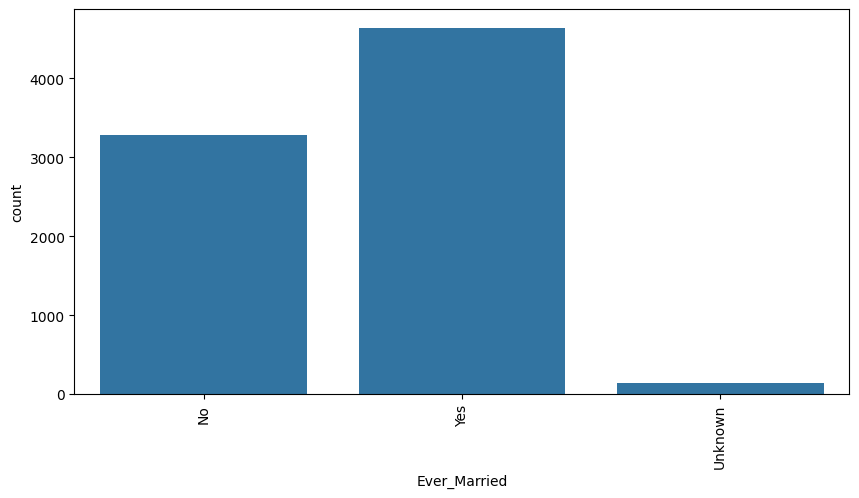

In [26]:
plt.figure(figsize = (10,5))
sns.countplot(data = customer_segmentation_train_df, x = 'Ever_Married')
plt.xticks(rotation = 90)
plt.show()

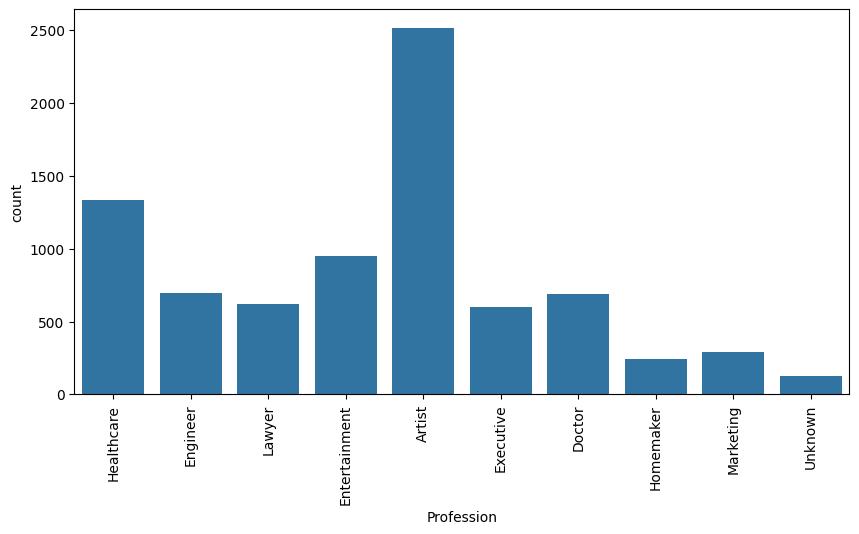

In [27]:
plt.figure(figsize = (10,5))
sns.countplot(data = customer_segmentation_train_df, x = 'Profession')
plt.xticks(rotation = 90)
plt.show()

In [28]:
customer_segmentation_train_df['Graduated'].fillna(value = 'Unknown', inplace = True)

/tmp/ipython-input-4076369453.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_segmentation_train_df['Graduated'].fillna(value = 'Unknown', inplace = True)


In [29]:
customer_segmentation_train_df['Graduated'].value_counts()

,count
Graduated,
Yes,4968
No,3022
Unknown,78


In [30]:
customer_segmentation_train_df['Var_1'].fillna(value = 'Unknown', inplace = True)

/tmp/ipython-input-2286322297.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_segmentation_train_df['Var_1'].fillna(value = 'Unknown', inplace = True)


In [31]:
customer_segmentation_train_df['Var_1'].value_counts()

,count
Var_1,
Cat_6,5238
Cat_4,1089
Cat_3,822
Cat_2,422
Cat_7,203
Cat_1,133
Cat_5,85
Unknown,76


In [32]:
customer_segmentation_train_df.Work_Experience.value_counts().head()

,count
Work_Experience,
1.00,2354
0.00,2318
9.00,474
8.00,463
2.00,286


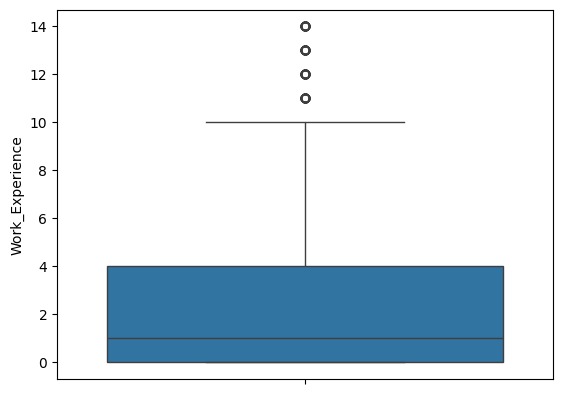

In [33]:
sns.boxplot(customer_segmentation_train_df.Work_Experience)
plt.show()

In [34]:
customer_segmentation_train_df.Work_Experience.quantile(q = [0.25, 0.5, 0.75, 1])
# є викиди

,Work_Experience
0.25,0.00
0.50,1.00
0.75,4.00
1.00,14.00


In [35]:
print(customer_segmentation_train_df.Work_Experience.mode()[0])
print(customer_segmentation_train_df.Work_Experience.median())
print(customer_segmentation_train_df.Work_Experience.mean())

1.0
1.0
2.641663213150988


In [36]:
column_name = 'Work_Experience'

In [37]:
def missing_lt1_analysis(column_name):

    print('Кількість пропущених значень в колонці\n')

    display(null_count[column_name])

    print('\nКількість зустрічань топ 5 частотних значень в колонці\n')

    display(customer_segmentation_train_df[column_name].value_counts().head())


    sns.boxplot(customer_segmentation_train_df[column_name])

    plt.show()


    print(f"\nПерцентилі колонки\n")

    display(customer_segmentation_train_df[column_name].quantile(q = [0.25,0.5,0.75,0.99,1]))

    print(f"\nНайчастотніше значення колонки\n")

    display(customer_segmentation_train_df[column_name].mode()[0])

    print(f"\nСереднє значення колонки\n")

    display(customer_segmentation_train_df[column_name].mean())

Кількість пропущених значень в колонці



np.int64(829)


Кількість зустрічань топ 5 частотних значень в колонці



,count
Work_Experience,
1.00,2354
0.00,2318
9.00,474
8.00,463
2.00,286


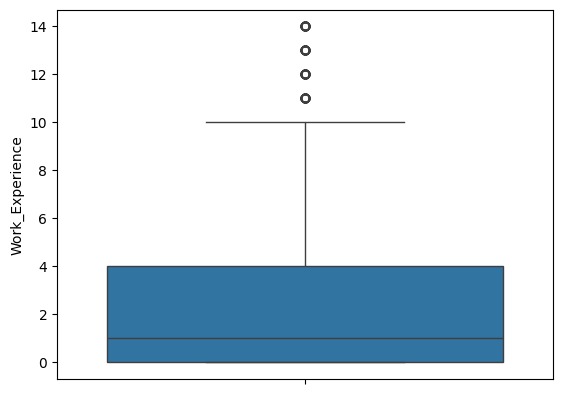


Перцентилі колонки



,Work_Experience
0.25,0.00
0.50,1.00
0.75,4.00
0.99,13.00
1.00,14.00



Найчастотніше значення колонки



np.float64(1.0)


Середнє значення колонки



np.float64(2.641663213150988)

In [38]:
missing_lt1_analysis('Work_Experience')

In [39]:
np.median(customer_segmentation_train_df['Work_Experience'])

np.float64(nan)

Кількість пропущених значень в колонці



np.int64(335)


Кількість зустрічань топ 5 частотних значень в колонці



,count
Family_Size,
2.00,2390
3.00,1497
1.00,1453
4.00,1379
5.00,612


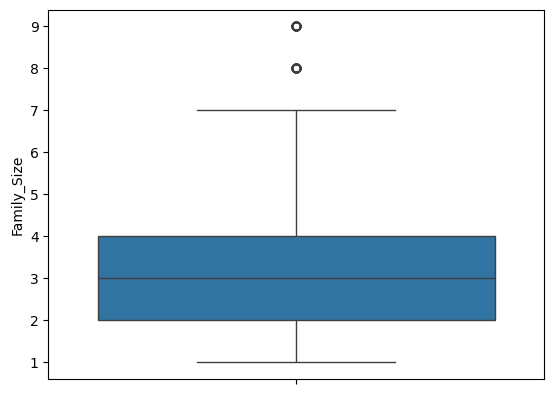


Перцентилі колонки



,Family_Size
0.25,2.00
0.50,3.00
0.75,4.00
0.99,8.00
1.00,9.00



Найчастотніше значення колонки



np.float64(2.0)


Середнє значення колонки



np.float64(2.85012285012285)

In [40]:
missing_lt1_analysis('Family_Size')

In [41]:
print(customer_segmentation_train_df.Family_Size.mode()[0])
print(customer_segmentation_train_df.Family_Size.median())
print(customer_segmentation_train_df.Family_Size.mean())

2.0
3.0
2.85012285012285


In [42]:
customer_segmentation_train_df['Work_Experience'].fillna(
    customer_segmentation_train_df['Work_Experience'].median(), inplace=True
)
customer_segmentation_train_df['Family_Size'].fillna(
    customer_segmentation_train_df['Family_Size'].median(), inplace=True
)

/tmp/ipython-input-3153013585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_segmentation_train_df['Work_Experience'].fillna(
/tmp/ipython-input-3153013585.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [43]:
customer_segmentation_train_df['Ever_Married'].fillna(
    customer_segmentation_train_df['Ever_Married'].mode()[0], inplace=True
)

Кількість пропущених значень в колонці



np.int64(140)


Кількість зустрічань топ 5 частотних значень в колонці



,count
Ever_Married,
Yes,4643
No,3285
Unknown,140


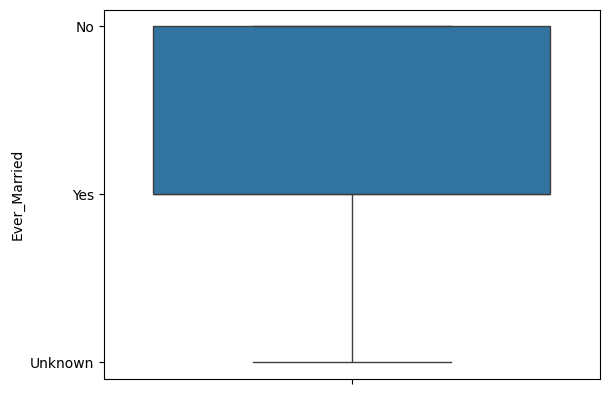


Перцентилі колонки



TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [45]:
missing_lt1_analysis('Ever_Married')

<Axes: >

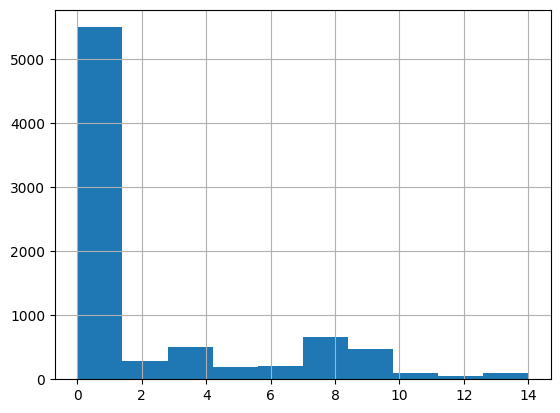

In [46]:
customer_segmentation_train_df['Work_Experience'].hist()

Кількість пропущених значень в колонці



np.int64(124)


Кількість зустрічань топ 5 частотних значень в колонці



,count
Profession,
Artist,2516
Healthcare,1332
Entertainment,949
Engineer,699
Doctor,688


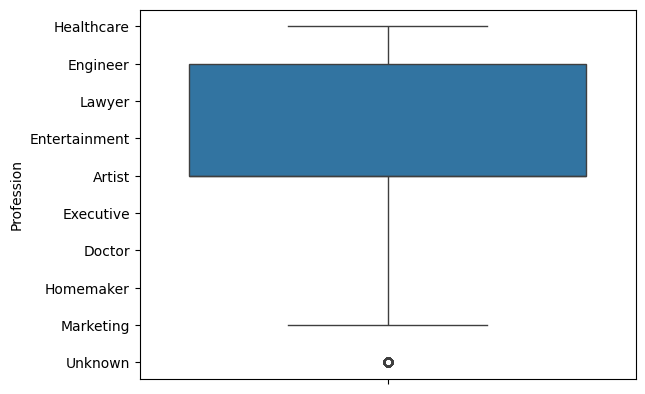


Перцентилі колонки



TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [47]:
missing_lt1_analysis('Profession')

Кількість пропущених значень в колонці



np.int64(78)


Кількість зустрічань топ 5 частотних значень в колонці



,count
Graduated,
Yes,4968
No,3022
Unknown,78


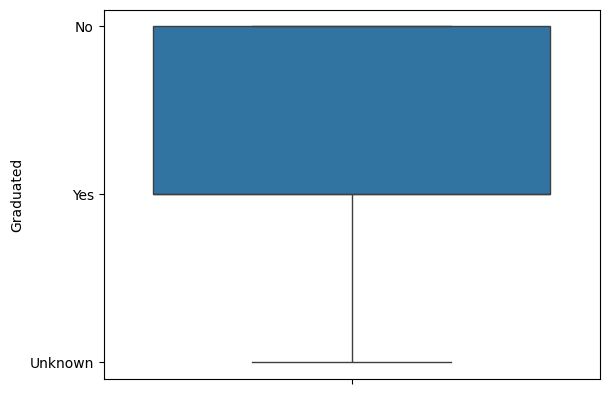


Перцентилі колонки



TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [49]:
missing_lt1_analysis('Graduated')

Кількість пропущених значень в колонці



np.int64(76)


Кількість зустрічань топ 5 частотних значень в колонці



,count
Var_1,
Cat_6,5238
Cat_4,1089
Cat_3,822
Cat_2,422
Cat_7,203


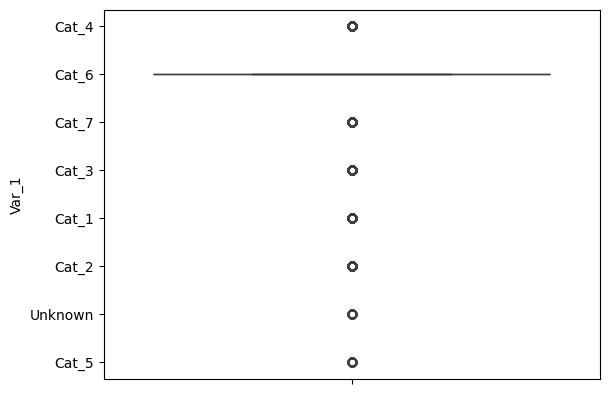


Перцентилі колонки



TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [50]:
missing_lt1_analysis('Var_1')

In [51]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

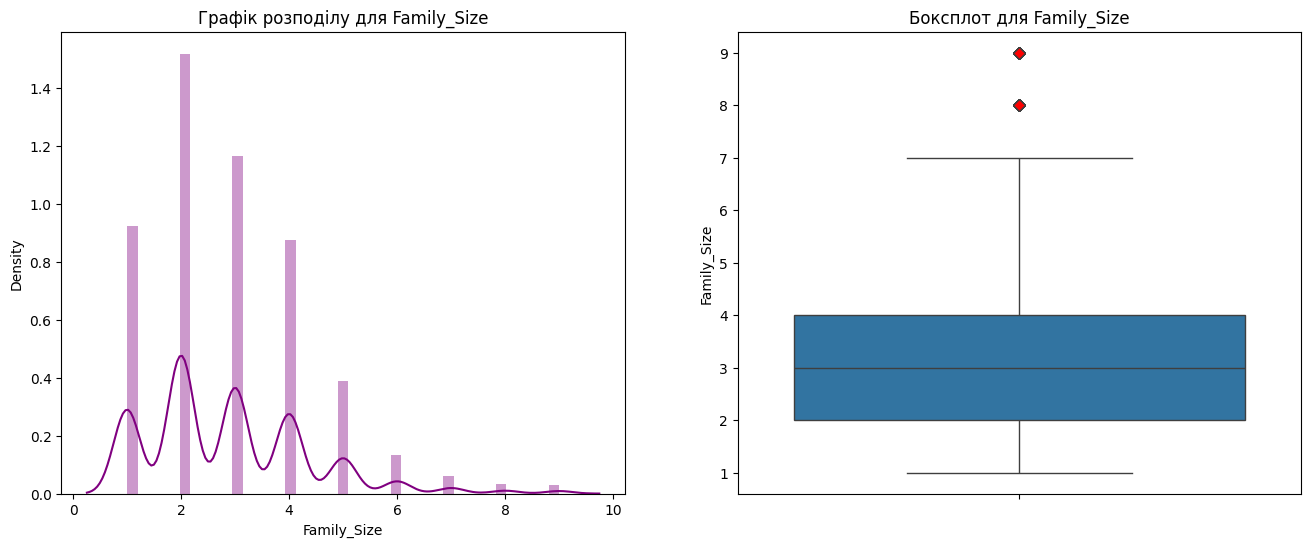

In [52]:
dist_box(customer_segmentation_train_df,'Family_Size')

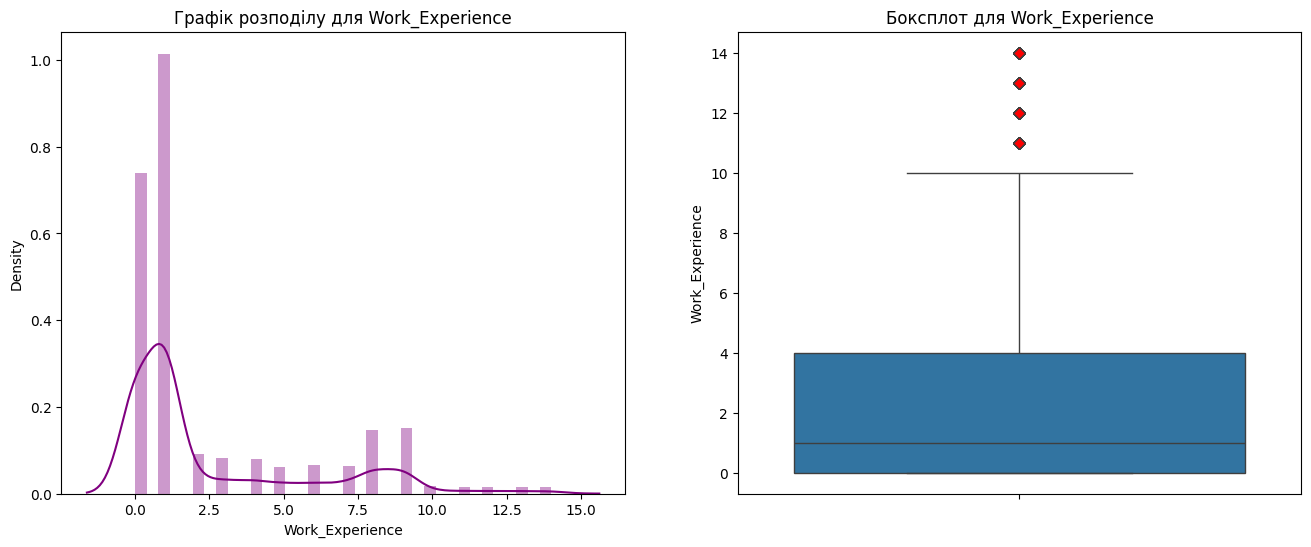

In [53]:
dist_box(customer_segmentation_train_df,'Work_Experience')

In [54]:
(customer_segmentation_train_df['Family_Size'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

,proportion
Family_Size,
2.00,29.62
3.00,22.71
1.00,18.01
4.00,17.09
5.00,7.59


In [55]:
Q1 = customer_segmentation_train_df['Family_Size'].quantile(0.25)
Q3 = customer_segmentation_train_df['Family_Size'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2.0


In [56]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: -1.0
Максимальне значення, після якого існують викиди: 7.0


In [57]:
Q1 = customer_segmentation_train_df['Work_Experience'].quantile(0.25)
Q3 = customer_segmentation_train_df['Work_Experience'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

4.0


In [58]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: -6.0
Максимальне значення, після якого існують викиди: 10.0


In [59]:
(customer_segmentation_train_df['Work_Experience'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

,proportion
Work_Experience,
1.00,39.45
0.00,28.73
9.00,5.88
8.00,5.74
2.00,3.54


In [60]:
customer_segmentation_train_df['Work_Experience_Changed'] = customer_segmentation_train_df['Work_Experience'].isnull().astype(int)
mode_value = customer_segmentation_train_df['Work_Experience'].mode()
customer_segmentation_train_df['Work_Experience'].fillna(value = mode_value, inplace = True)

/tmp/ipython-input-337532409.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_segmentation_train_df['Work_Experience'].fillna(value = mode_value, inplace = True)


In [61]:
customer_segmentation_train_df['Work_Experience'].value_counts()

,count
Work_Experience,
1.00,3183
0.00,2318
9.00,474
8.00,463
2.00,286
3.00,255
4.00,253
6.00,204
7.00,196


In [62]:
customer_segmentation_train_df['Work_Experience'].isnull().sum()

np.int64(0)

In [63]:
customer_segmentation_train_df['Family_Size_Changed'] = customer_segmentation_train_df['Family_Size'].isnull().astype(int)
mode_value = customer_segmentation_train_df['Family_Size'].mode()[0]
customer_segmentation_train_df['Family_Size'].fillna(value=mode_value, inplace = True)

/tmp/ipython-input-3314807279.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_segmentation_train_df['Family_Size'].fillna(value=mode_value, inplace = True)


In [64]:
customer_segmentation_train_df['Family_Size'].value_counts()

,count
Family_Size,
2.00,2390
3.00,1832
1.00,1453
4.00,1379
5.00,612
6.00,212
7.00,96
8.00,50
9.00,44


In [65]:
customer_segmentation_train_df['Family_Size'].isnull().sum()

np.int64(0)

Колонку Work_Experience з пропущеними значеннями 10,28% заповнила модою.
Колонку Family_Size з пропущеними значеннями 4,15% теж заповнила модою. В цих двох колонках є викиди.

І пропущені значення в чотирьох категоріальних колонках Ever Married, Profession, Graduated, Var_1 заповнила Unknown.  Не впевнена, якщо чесно, чи правильно. Тому що в колонках Ever Married та Graduated, наприклад, були значення Yes/No. Але відсоток пропущених значень в цих чотирьох колонках 0,94% - 1,74%. Тобто, не значний.

In [66]:
#   розбиваємо на тренувальну та тестувальні вибірки
from sklearn.model_selection import train_test_split

X = customer_segmentation_train_df.drop('Segmentation', axis=1)
y = customer_segmentation_train_df['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

print("Розмір тренувальної вибірки X_train:", X_train.shape)
print("Розмір тестувальної вибірки X_test:", X_test.shape)
print("Розмір тренувальної вибірки y_train:", y_train.shape)
print("Розмір тестувальної вибірки y_test:", y_test.shape)
print("\nРозподіл класів в оригінальному датасеті:")
print(y.value_counts(normalize=True))
print("\nРозподіл класів в тренувальній вибірці:")
print(y_train.value_counts(normalize=True))
print("\nРозподіл класів в тестувальній вибірці:")
print(y_test.value_counts(normalize=True))

Розмір тренувальної вибірки X_train: (4840, 12)
Розмір тестувальної вибірки X_test: (3228, 12)
Розмір тренувальної вибірки y_train: (4840,)
Розмір тестувальної вибірки y_test: (3228,)

Розподіл класів в оригінальному датасеті:
Segmentation
D   0.28
A   0.24
C   0.24
B   0.23
Name: proportion, dtype: float64

Розподіл класів в тренувальній вибірці:
Segmentation
D   0.28
A   0.24
C   0.24
B   0.23
Name: proportion, dtype: float64

Розподіл класів в тестувальній вибірці:
Segmentation
D   0.28
A   0.24
C   0.24
B   0.23
Name: proportion, dtype: float64


In [67]:
customer_segmentation_train_df['Segmentation'].value_counts()

,count
Segmentation,
D,2268
A,1972
C,1970
B,1858


**Завдання 2. Важливо уважно прочитати все формулювання цього завдання до кінця!**

Застосуйте методи ресемплингу даних SMOTE та SMOTE-Tomek з бібліотеки imbalanced-learn до тренувальної вибірки. В результаті у Вас має вийти 2 тренувальних набори: з апсемплингом зі SMOTE, та з ресамплингом з SMOTE-Tomek.

Увага! В нашому наборі даних є як категоріальні дані, так і звичайні числові. Базовий SMOTE не буде правильно працювати з категоріальними даними, але є його модифікація, яка буде. Тому в цього завдання є 2 виконання

  1. Застосувати SMOTE базовий лише на НЕкатегоріальних ознаках.

  2. Переглянути інформацію про метод [SMOTENC](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) і використати цей метод в цій задачі. За цей спосіб буде +3 бали за це завдання і він рекомендований для виконання.

  **Підказка**: аби скористатись SMOTENC треба створити змінну, яка містить індекси ознак, які є категоріальними (їх номер серед колонок) і передати при ініціації екземпляра класу `SMOTENC(..., categorical_features=cat_feature_indeces)`.
  
  Ви також можете розглянути варіант використання варіації SMOTE, який працює ЛИШЕ з категоріальними ознаками [SMOTEN](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTEN.html)

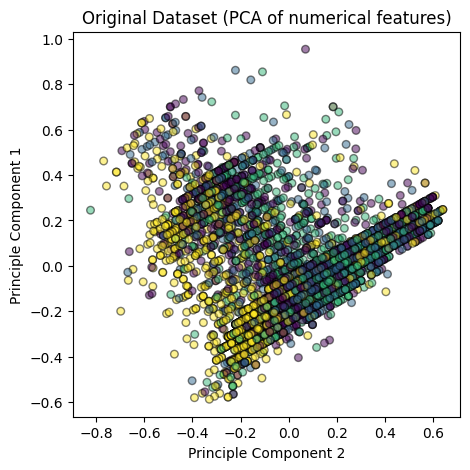

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns for scaling and PCA
numerical_features = X_train.select_dtypes(include=np.number).columns

scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])
X_train_scaled = scaler.transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Function for plotting dataset
def plot_data(X, y, ax, title):
    # Map categorical labels to numerical values for plotting
    label_map = {label: i for i, label in enumerate(np.unique(y))}
    y_numeric = y.map(label_map)
    ax.scatter(X[:, 0], X[:, 1], c=y_numeric, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

# Plot dataset
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_pca, y_train, ax, title='Original Dataset (PCA of numerical features)')

In [73]:
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTETomek
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Identify categorical features indices
categorical_features = X_train.select_dtypes(include='object').columns
categorical_features_indices = [X_train.columns.get_loc(col) for col in categorical_features]

# Apply SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_train_smotenc, y_train_smotenc = smote_nc.fit_resample(X_train, y_train)

print("Shape of X_train after SMOTENC:", X_train_smotenc.shape)
print("Distribution of classes in y_train after SMOTENC:")
print(y_train_smotenc.value_counts(normalize=True))

# Define the preprocessor for both numerical and categorical features
numerical_features = X_train.select_dtypes(include=np.number).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Process the training data before applying SMOTE-Tomek
X_train_processed = preprocessor.fit_transform(X_train)


# Apply SMOTE-Tomek
smt = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smt.fit_resample(X_train_processed, y_train)

print("\nShape of X_train after SMOTE-Tomek:", X_train_smotetomek.shape)
print("Distribution of classes in y_train after SMOTE-Tomek:")
print(y_train_smotetomek.value_counts(normalize=True))

Shape of X_train after SMOTENC: (5440, 12)
Distribution of classes in y_train after SMOTENC:
Segmentation
C   0.25
B   0.25
D   0.25
A   0.25
Name: proportion, dtype: float64

Shape of X_train after SMOTE-Tomek: (4724, 4874)
Distribution of classes in y_train after SMOTE-Tomek:
Segmentation
C   0.25
D   0.25
A   0.25
B   0.25
Name: proportion, dtype: float64


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the preprocessor for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Process the original training and testing data
X_train_processed_original = preprocessor.fit_transform(X_train)
X_test_processed_original = preprocessor.transform(X_test)

# 1. Train Logistic Regression on Original Data
model_original = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)
model_original.fit(X_train_processed_original, y_train)
y_pred_original = model_original.predict(X_test_processed_original)

print("Classification Report for Original Data:")
print(classification_report(y_test, y_pred_original))

# Process the SMOTENC data
X_train_smotenc_processed = preprocessor.transform(X_train_smotenc)

# 2. Train Logistic Regression on SMOTENC Data
model_smotenc = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)
model_smotenc.fit(X_train_smotenc_processed, y_train_smotenc)
y_pred_smotenc = model_smotenc.predict(X_test_processed_original)

print("\nClassification Report for SMOTENC Data:")
print(classification_report(y_test, y_pred_smotenc))

# 3. Train Logistic Regression on SMOTE-Tomek Data
model_smotetomek = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)
model_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)
y_pred_smotetomek = model_smotetomek.predict(X_test_processed_original) # Use X_test_processed_original here

print("\nClassification Report for SMOTE-Tomek Data:")
print(classification_report(y_test, y_pred_smotetomek))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report for Original Data:
              precision    recall  f1-score   support

           A       0.43      0.46      0.45       789
           B       0.41      0.19      0.26       743
           C       0.47      0.61      0.54       788
           D       0.66      0.74      0.70       908

    accuracy                           0.52      3228
   macro avg       0.49      0.50      0.48      3228
weighted avg       0.50      0.52      0.50      3228


Classification Report for SMOTENC Data:
              precision    recall  f1-score   support

           A       0.43      0.47      0.45       789
           B       0.38      0.22      0.28       743
           C       0.48      0.59      0.53       788
           D       0.67      0.71      0.69       908

    accuracy                           0.51      3228
   macro avg       0.49      0.50      0.49      3228
weighted avg       0.50      0.51      0.50      3228


Classification Report for SMOTE-Tomek Data:
   

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


**Завдання 3**.
  1. Навчіть модель логістичної регресії з використанням стратегії One-vs-Rest з логістичною регресією на оригінальних даних, збалансованих з SMOTE, збалансованих з Smote-Tomek.  
  2. Виміряйте якість кожної з натренованих моделей використовуючи `sklearn.metrics.classification_report`.
  3. Напишіть, яку метрику ви обрали для порівняння моделей.
  4. Яка модель найкраща?
  5. Якщо немає суттєвої різниці між моделями - напишіть свою гіпотезу, чому?

Оригінальні дані

Accuracy: 0.52 / Macro F1: 0.48

Найкраще працює для класу D, найгірше для B.

SMOTENC

Accuracy: 0.51 / Macro F1: 0.49

Легка стабілізація, але клас B досі дуже слабкий.

SMOTE-Tomek

Accuracy: 0.52 / Macro F1: 0.49

Подібні результати до SMOTENC, трохи краща recall для A і C.

Я б обрала Macro F1-score для порівняння моделей, тому що метрика враховує баланс по всіх класах.

Суттєвої різниці між моделями немає. Можливо тому що логічтична регресія не справляється через лінійність.